In [24]:
import numpy as np
import scipy.special 
import matplotlib.pyplot as plt
from NN import NN_Classifier

ROOT = "/Users/payalchandak/Not On Dropbox/Data/Neural Net Trial/"

In [25]:
nn = NN_Classifier([784, 100, 10], 0.3)

In [26]:
# load data

training_data_file = open(ROOT+"/mnist_train.csv", 'r')
training_data  = training_data_file.readlines()
training_data_file.close()

test_data_file = open(ROOT+"/mnist_test.csv", 'r')
test_data = test_data_file.readlines()
test_data_file.close()

In [27]:
# train

EPOCHS = 5; train_loss = []
for e in range(EPOCHS):
    for rec in training_data:
        data = rec.split(',')
        inputs = (np.asfarray(data[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(nn.nodes[nn.out].shape)+0.01
        targets[int(data[0])] = 0.99
        nn.train(inputs,targets)
        train_loss.append(nn.get_loss())

In [28]:
# test 
answers = []; predictions = []; test_loss = []
for rec in test_data:
    data = rec.split(',')
    answers.append(int(data[0]))
    targets = np.zeros(nn.nodes[nn.out].shape)+0.01
    targets[int(data[0])] = 0.99
    inputs = (np.asfarray(data[1:]) / 255.0 * 0.99) + 0.01
    predictions.append(np.argmax(nn.test(inputs)))
    test_loss.append(nn.get_loss(targets=targets))

In [29]:
i = 0
for z,y in zip(answers, predictions):
    if (i<10):
        print(z,y)
        i+=1
    else:
        break

7 1
2 1
1 1
0 1
4 1
1 1
4 1
9 1
5 1
9 1


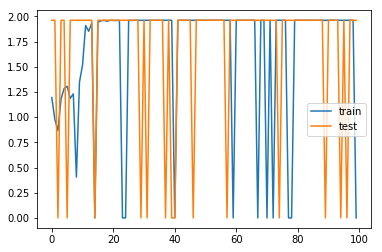

In [30]:
import matplotlib.pyplot as plt 
n = 100
plt.plot([x for x in range(n)], train_loss[:n])
plt.plot([x for x in range(n)], test_loss[:n])
plt.legend(labels=['train','test'])
plt.show()